<a href="https://colab.research.google.com/github/AnushkaKanabar/Supervised-Techniques-for-Parkinson-s-Disease-Detection/blob/main/Diagnosing_Parkinson's_disease_using_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.3f}'.format
np.set_printoptions(precision=2)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Step 1 : Load the dataset

In [ ]:
data=pd.read_csv('parkinsons.csv')
data.sample(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
33,phon_R01_S07_4,202.266,211.604,197.079,0.002,0.000,0.001,0.001,0.003,0.010,...,0.014,0.001,32.684,0,0.369,0.742,-7.696,0.179,1.545,0.056
102,phon_R01_S24_6,139.224,586.567,66.157,0.030,0.000,0.019,0.016,0.056,0.094,...,0.167,0.259,10.489,1,0.596,0.641,-3.269,0.271,2.691,0.445
178,phon_R01_S44_2,148.790,158.359,138.990,0.003,0.000,0.002,0.002,0.005,0.016,...,0.025,0.005,24.412,1,0.403,0.763,-6.312,0.182,2.252,0.160
112,phon_R01_S26_4,204.664,221.300,189.621,0.008,0.000,0.005,0.005,0.015,0.024,...,0.038,0.013,21.305,1,0.499,0.722,-4.876,0.212,2.377,0.268
58,phon_R01_S16_5,116.879,131.897,108.153,0.008,0.000,0.003,0.005,0.010,0.026,...,0.042,0.008,22.603,1,0.540,0.813,-4.477,0.263,1.827,0.326


# Step 2 : Eye-ball raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. Mention a few comments in this regard 

In [ ]:
data.head(5)
data.tail(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.008,0.000,0.004,0.006,0.011,0.044,...,0.065,0.022,21.033,1,0.415,0.815,-4.813,0.266,2.301,0.285
1,phon_R01_S01_2,122.400,148.650,113.819,0.010,0.000,0.005,0.007,0.014,0.061,...,0.094,0.019,19.085,1,0.458,0.820,-4.075,0.336,2.487,0.369
2,phon_R01_S01_3,116.682,131.111,111.555,0.011,0.000,0.005,0.008,0.016,0.052,...,0.083,0.013,20.651,1,0.430,0.825,-4.443,0.311,2.342,0.333
3,phon_R01_S01_4,116.676,137.871,111.366,0.010,0.000,0.005,0.007,0.015,0.055,...,0.088,0.014,20.644,1,0.435,0.819,-4.118,0.334,2.406,0.369
4,phon_R01_S01_5,116.014,141.781,110.655,0.013,0.000,0.007,0.009,0.020,0.064,...,0.105,0.018,19.649,1,0.417,0.823,-3.748,0.235,2.332,0.410


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.005,0.000,0.003,0.003,0.008,0.041,...,0.070,0.028,19.517,0,0.448,0.658,-6.539,0.122,2.657,0.133
191,phon_R01_S50_3,209.516,253.017,89.488,0.006,0.000,0.003,0.003,0.010,0.028,...,0.048,0.018,19.147,0,0.432,0.683,-6.195,0.129,2.784,0.169
192,phon_R01_S50_4,174.688,240.005,74.287,0.014,0.000,0.006,0.006,0.019,0.023,...,0.038,0.107,17.883,0,0.408,0.656,-6.787,0.158,2.680,0.132
193,phon_R01_S50_5,198.764,396.961,74.904,0.007,0.000,0.004,0.004,0.011,0.023,...,0.038,0.072,19.020,0,0.451,0.644,-6.745,0.207,2.139,0.123
194,phon_R01_S50_6,214.289,260.277,77.973,0.006,0.000,0.003,0.003,0.009,0.019,...,0.031,0.044,21.209,0,0.463,0.664,-5.724,0.191,2.555,0.149


In [ ]:
data.sample(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
23,phon_R01_S05_6,173.917,192.735,86.180,0.005,0.000,0.002,0.003,0.007,0.042,...,0.066,0.018,20.422,1,0.537,0.687,-5.249,0.210,2.548,0.254
67,phon_R01_S18_2,136.969,166.607,66.004,0.009,0.000,0.005,0.005,0.015,0.031,...,0.049,0.027,19.979,1,0.498,0.729,-5.325,0.206,2.292,0.226
16,phon_R01_S04_5,144.188,349.259,82.764,0.005,0.000,0.002,0.003,0.006,0.020,...,0.029,0.019,22.333,1,0.567,0.645,-5.440,0.240,2.265,0.218
147,phon_R01_S35_2,183.520,216.814,161.340,0.015,0.000,0.008,0.008,0.025,0.060,...,0.086,0.061,14.367,1,0.478,0.769,-4.277,0.356,3.142,0.336
160,phon_R01_S39_2,114.238,124.393,77.022,0.006,0.000,0.003,0.003,0.009,0.040,...,0.047,0.021,20.437,1,0.653,0.695,-5.186,0.259,2.151,0.245


In [ ]:
data.shape
data.size

(195, 24)

4680

In [ ]:
data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

### We find that the 24 columns have following datatypes:
 * 1) name- Qualitative Datatype(Object). It has completely unique values, hence has no predictive power.  
 * 2) MDVP:Fo(Hz)- Continous Numerical Datatype (float64)
 * 3) MDVP:Fhi(Hz)- Continous Numerical Datatype (float64)
 * 4) MDVP:Flo(Hz)- Continous Numerical Datatype (float64)
 * 5) MDVP:Jitter(%)- Continous Numerical Datatype (float64)
 * 6) MDVP:Jitter(Abs)- Continous Numerical Datatype (float64)
 * 7) MDVP:RAP- Continous Numerical Datatype (float64)
 * 8) MDVP:PPQ- Continous Numerical Datatype (float64)
 * 9) Jitter:DDP- Continous Numerical Datatype (float64)
 * 10) MDVP:Shimmer- Continous Numerical Datatype (float64)
 * 11) MDVP:Shimmer(dB)- Continous Numerical Datatype (float64)
 * 12) Shimmer:APQ3- Continous Numerical Datatype (float64)
 * 13) Shimmer:APQ5- Continous Numerical Datatype (float64)
 * 14) MDVP:APQ- Continous Numerical Datatype (float64)
 * 15) Shimmer:DDA - Continous Numerical Datatype (float64)
 * 16) NHR - Continous Numerical Datatype (float64)
 * 17) HNR - Continous Numerical Datatype (float64)
 * 18) status  - Discrete Numerical Datatype (int64)  
 * 19) RPDE- Continous Numerical Datatype (float64)
 * 20) DFA - Continous Numerical Datatype (float64)
 * 21) spread1 - Continous Numerical Datatype (float64)
 * 22) spread2- Continous Numerical Datatype (float64)
 * 23) D2 - Continous Numerical Datatype (float64)
 * 24) PPE - Continous Numerical Datatype (float64)

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.000,154.229,41.390,88.333,117.572,148.790,182.769,260.105
MDVP:Fhi(Hz),195.000,197.105,91.492,102.145,134.863,175.829,224.206,592.030
MDVP:Flo(Hz),195.000,116.325,43.521,65.476,84.291,104.315,140.019,239.170
MDVP:Jitter(%),195.000,0.006,0.005,0.002,0.003,0.005,0.007,0.033
MDVP:Jitter(Abs),195.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
MDVP:RAP,195.000,0.003,0.003,0.001,0.002,0.003,0.004,0.021
MDVP:PPQ,195.000,0.003,0.003,0.001,0.002,0.003,0.004,0.020
Jitter:DDP,195.000,0.010,0.009,0.002,0.005,0.007,0.012,0.064
MDVP:Shimmer,195.000,0.030,0.019,0.010,0.017,0.023,0.038,0.119
MDVP:Shimmer(dB),195.000,0.282,0.195,0.085,0.148,0.221,0.350,1.302


* Data has values in hundreds, decimals as well as negative values.Appropriate Scaling has to be done on data to bring all values on a uniform scale.
* MDVP:Fo,Fhi,Flo all have mean greater than median with a max value much higher than Q3. All seems to have a right tailed distribution.
* MDVP:Fhi has a high std dev of 91.5, which indicates a greater spread of data.

In [ ]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

### Likely Challenges in Data:

#### 1) We checked that there is no null value in data.
#### 2) The Continous Numeric variables are on different scales- 3 digit nos, Decimals, also Negative numbers. We will have to do appropriate scaling of data to bring all values in a uniform scale.
#### 3) Name col has completely primary values. Since it has no predictive power, we can drop this column.

# Step 3 :Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails, relationships between variables etc. mention your observations

### 1) MDVP:Fo(Hz)

In [ ]:
data['MDVP:Fo(Hz)'].value_counts(bins=5)

(88.16, 122.687]      66
(122.687, 157.042]    51
(157.042, 191.396]    35
(191.396, 225.751]    29
(225.751, 260.105]    14
Name: MDVP:Fo(Hz), dtype: int64

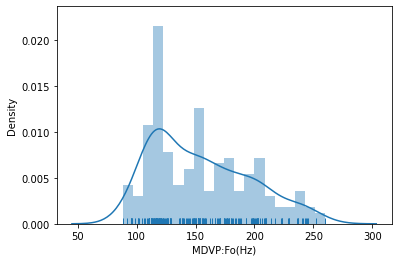

In [ ]:
sns.distplot(data['MDVP:Fo(Hz)'],rug=True,kde=True,bins=20);

#### It is a Right Skewed Distribution with the max value at 260. Values between 110-122 have a high Mode for this feature. 

### 2) MDVP:Fhi(Hz)

In [ ]:
data['MDVP:Fhi(Hz)'].value_counts(bins=5)

(101.654, 200.122]    116
(200.122, 298.099]     67
(396.076, 494.053]      6
(494.053, 592.03]       5
(298.099, 396.076]      1
Name: MDVP:Fhi(Hz), dtype: int64

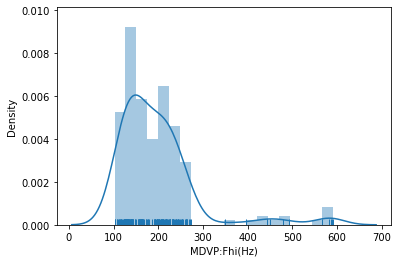

In [ ]:
sns.distplot(data['MDVP:Fhi(Hz)'],rug=True,kde=True,bins=20);

#### 1) It is a Right Skewed Distribution because it has some outliers in right ranging from 350 to 592. 

#### 2) Max value of 592 is very high than the Quartile values. Spread of values for this feature is also very high - Std Dev=91.5

#### 3) Most of the values lie between 100 and 300

### 3) MDVP:Flo(Hz)

In [ ]:
data['MDVP:Flo(Hz)'].value_counts(bins=5)

(65.301, 100.215]     91
(100.215, 134.954]    53
(134.954, 169.692]    24
(169.692, 204.431]    15
(204.431, 239.17]     12
Name: MDVP:Flo(Hz), dtype: int64

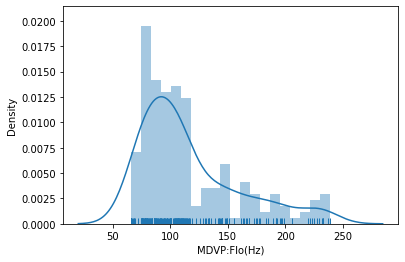

In [ ]:
sns.distplot(data['MDVP:Flo(Hz)'],rug=True,kde=True,bins=20);

#### 1) It is a Right Skewed Distribution with some outliers in the right side of the distribution.

#### 2) Most of the values lie between 65 and 150

### 4) MDVP:Jitter(%)

In [ ]:
data['MDVP:Jitter(%)'].value_counts(bins=5)

(0.00065, 0.00798]    160
(0.00798, 0.0143]      23
(0.0143, 0.0206]        8
(0.0269, 0.0332]        4
(0.0206, 0.0269]        0
Name: MDVP:Jitter(%), dtype: int64

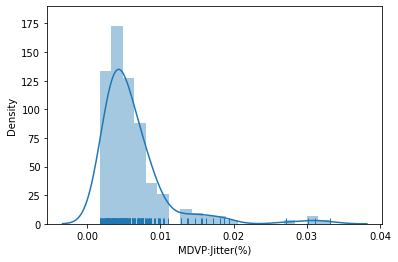

In [ ]:
sns.distplot(data['MDVP:Jitter(%)'],rug=True,kde=True,bins=20);

#### 1) This feature has a Right Skewed Distribution with many outliers in right till 0.035 . Mode value for Jitter% is around 0.005

#### 2) Most of the values lie betwwen 0.00065 and 0.0143

### 5) MDVP:Jitter(Abs)

In [ ]:
data['MDVP:Jitter(Abs)'].value_counts(bins=5)

(-0.00099325, 5.76e-05]    145
(5.76e-05, 0.000108]        41
(0.000108, 0.000159]         6
(0.000209, 0.00026]          2
(0.000159, 0.000209]         1
Name: MDVP:Jitter(Abs), dtype: int64

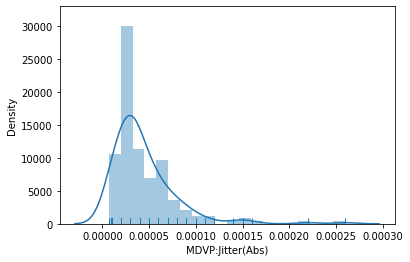

In [ ]:
sns.distplot(data['MDVP:Jitter(Abs)'],rug=True,kde=True,bins=20);

#### 1) Abs Jitter has a Right Skewed Distribution with few outliers till 0.00030

#### 2) Most of the values lie between -0.00099325 and 0.000108

### 6) MDVP: RAP

In [ ]:
data['MDVP:RAP'].value_counts(bins=5)

(-0.00034100000000000005, 0.00483]    168
(0.00483, 0.00898]                     17
(0.00898, 0.0131]                       6
(0.0173, 0.0214]                        3
(0.0131, 0.0173]                        1
Name: MDVP:RAP, dtype: int64

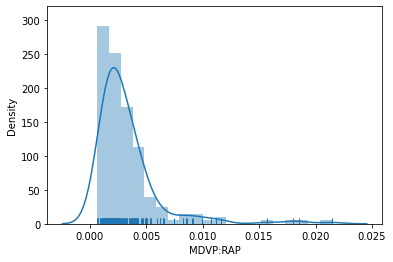

In [ ]:
sns.distplot(data['MDVP:RAP'],rug=True,kde=True,bins=20);

#### 1) MDVP:RAP is a Right Skewed Distribution.There are few outliers in right side of distribution.

#### 2) Most of the values lie between -0.00034100000000000005 and 0.00898

### 7) MDVP:PPQ

In [ ]:
data['MDVP:PPQ'].value_counts(bins=5)

(-9.900000000000002e-05, 0.00465]    164
(0.00465, 0.00838]                    20
(0.00838, 0.0121]                      7
(0.0158, 0.0196]                       3
(0.0121, 0.0158]                       1
Name: MDVP:PPQ, dtype: int64

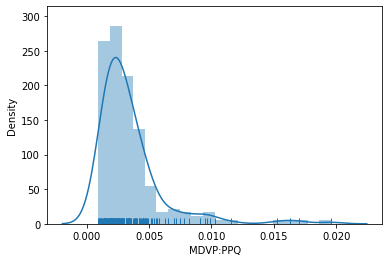

In [ ]:
sns.distplot(data['MDVP:PPQ'],rug=True,kde=True,bins=20);

#### 1) Much Similiar to MDVP:RAP, MDVP:PPQ also has Right Skewed Distribution with some outliers in right till 0.02. 

#### 2) Most of the values lie betwee -9.900000000000002e-05 and 0.00838

### 8) Jitter:DDP

In [ ]:
data['Jitter:DDP'].value_counts(bins=5)

(0.00098, 0.0145]    168
(0.0145, 0.027]       17
(0.027, 0.0394]        6
(0.0519, 0.0643]       3
(0.0394, 0.0519]       1
Name: Jitter:DDP, dtype: int64

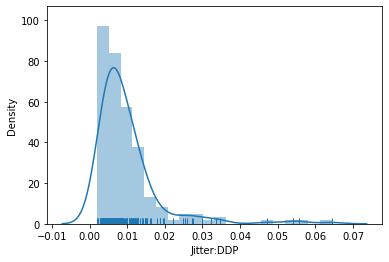

In [ ]:
sns.distplot(data['Jitter:DDP'],rug=True,kde=True,bins=20);

#### 1) Jitter DDP is also a Right Skewed Distribution with some outliers in right till 0.07. 

#### 2) Most of the values lie between 0.00098 and 0.027

### 9) MDVP:Shimmer

In [ ]:
data['MDVP:Shimmer'].value_counts(bins=5)

(0.00843, 0.0314]    128
(0.0314, 0.0534]      43
(0.0534, 0.0753]      18
(0.0753, 0.0972]       5
(0.0972, 0.119]        1
Name: MDVP:Shimmer, dtype: int64

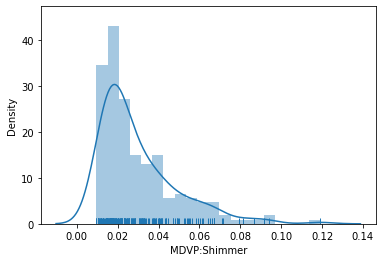

In [ ]:
sns.distplot(data['MDVP:Shimmer'],rug=True,kde=True,bins=20);

#### 1) MDVP:Shimmer is a Right Skewed Distribution with few outliers at Right. 

#### 2) Most of the values lie between 0.00843 and 0.0753

### 10) MDVP:Shimmer(dB)

In [ ]:
data['MDVP:Shimmer(dB)'].value_counts(bins=5)

(0.0828, 0.328]    139
(0.328, 0.572]      38
(0.572, 0.815]      12
(0.815, 1.059]       5
(1.059, 1.302]       1
Name: MDVP:Shimmer(dB), dtype: int64

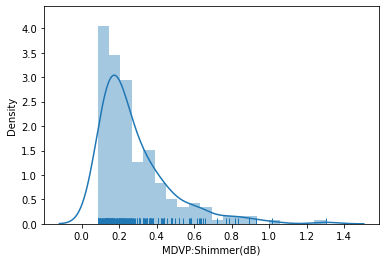

In [ ]:
sns.distplot(data['MDVP:Shimmer(dB)'],rug=True,kde=True,bins=20);

#### 1) These are the Shimmer values in dB. Similar to MDVP:Shimmer, it is a Right Skewed Distribution with outliers lying in the right.  

#### 2) Most of the values lie between 0.0828 and 0.815

### 11) Shimmer:APQ5

In [ ]:
data['Shimmer:APQ5'].value_counts(bins=5)

(0.00463, 0.0204]    142
(0.0204, 0.0352]      29
(0.0352, 0.0499]      20
(0.0499, 0.0647]       3
(0.0647, 0.0794]       1
Name: Shimmer:APQ5, dtype: int64

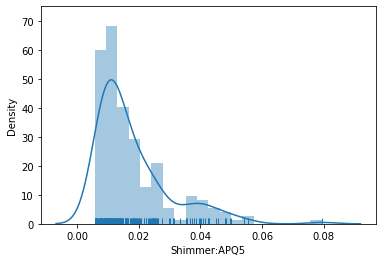

In [ ]:
sns.distplot(data['Shimmer:APQ5'],rug=True,kde=True,bins=20);

#### 1) Again, Shimmer:APQ5 has a Right Skewed Distribution with outliers in right. 

#### 2) Most values for this feature lie in range 0.00463 to 0.0499

### 12) MDVP:APQ

In [ ]:
data['MDVP:APQ'].mode()

0   0.009
1   0.011
2   0.011
3   0.012
4   0.015
5   0.038
dtype: float64

In [ ]:
data['MDVP:APQ'].value_counts(bins=5)

(0.00606, 0.0333]    155
(0.0333, 0.0594]      31
(0.0594, 0.0855]       7
(0.0855, 0.112]        1
(0.112, 0.138]         1
Name: MDVP:APQ, dtype: int64

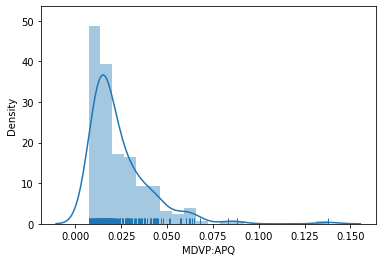

In [ ]:
sns.distplot(data['MDVP:APQ'],rug=True,kde=True,bins=20);

#### 1) MDVP:APQ is a Right Skewed Distribution with outliers in right. This feature has 6 modal values 0.00903, 0.01133, 0.0114, 0.01234, 0.01491, 0.03772

#### 2) Most of the values lie between 0.00606 and 0.0594

### 13)Shimmer:DDA

In [ ]:
data['Shimmer:DDA'].mode()

0   0.016
1   0.019
2   0.022
3   0.038
4   0.045
5   0.047
dtype: float64

In [ ]:
data['Shimmer:DDA'].value_counts(bins=5)

(0.0125, 0.0448]    121
(0.0448, 0.076]      43
(0.076, 0.107]       20
(0.107, 0.138]        8
(0.138, 0.169]        3
Name: Shimmer:DDA, dtype: int64

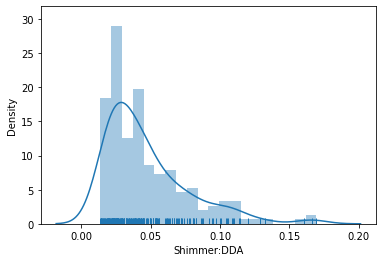

In [ ]:
sns.distplot(data['Shimmer:DDA'],rug=True,kde=True,bins=20);

#### Shimmer:DDA is also a Right Skewed Distribution with outliers in right. It has 6 modal values 0.01567, 0.01898, 0.02184, 0.03831, 0.04451, 0.04736

### 14) NHR

In [ ]:
data['NHR'].value_counts(bins=5)

(-0.0006640000000000001, 0.0635]    178
(0.0635, 0.126]                      12
(0.126, 0.189]                        2
(0.252, 0.315]                        2
(0.189, 0.252]                        1
Name: NHR, dtype: int64

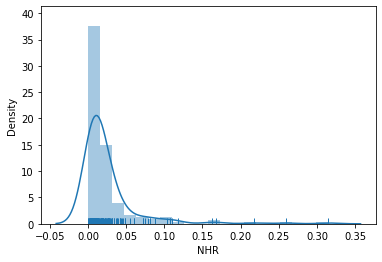

In [ ]:
sns.distplot(data['NHR'],rug=True,kde=True,bins=20);

#### 1) NHR is a Right Skewed Distribution with few outliers in right.

#### 2) Most of the values lie between -0.000664 and 0.126

### 15) HNR

In [ ]:
data['HNR'].value_counts(bins=5)

(18.283, 23.205]               85
(23.205, 28.126]               72
(13.362, 18.283]               20
(8.415000000000001, 13.362]    10
(28.126, 33.047]                8
Name: HNR, dtype: int64

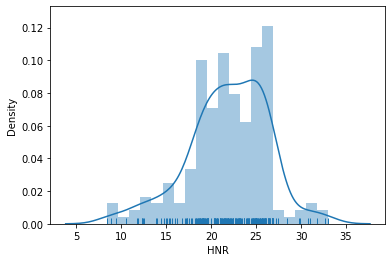

In [ ]:
sns.distplot(data['HNR'],rug=True,kde=True,bins=20);

#### 1) HNR is a Left skewed Distribution with few outliers in lying in the left-side. 

#### 2) Most of the values lie between 13 and 28.

### 16) status

In [ ]:
data['status'].value_counts(normalize=True)*100

1   75.385
0   24.615
Name: status, dtype: float64

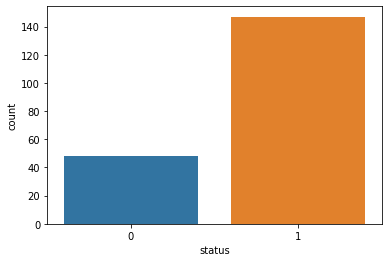

In [ ]:
sns.countplot(data['status'])

#### Status is the target feature with 75% class 1 values and 25% class 0 values. These binary classes are balanced for further analysis.

### 17) RPDE

In [ ]:
data['RPDE'].value_counts(bins=5)

(0.428, 0.514]    57
(0.514, 0.599]    45
(0.599, 0.685]    41
(0.342, 0.428]    36
(0.255, 0.342]    16
Name: RPDE, dtype: int64

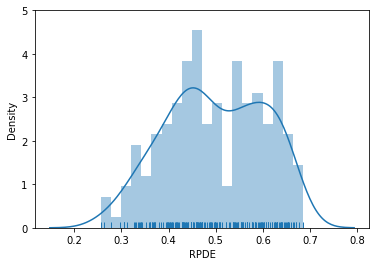

In [ ]:
sns.distplot(data['RPDE'],rug=True,kde=True,bins=20);

#### 1) It is a near normal Distribution with all the values lying in range 0.25 to 0.7

#### 2) Mean and Median are nearly equal. 

### 18)DFA

In [ ]:
data['DFA'].value_counts(bins=5)

(0.725, 0.775]    61
(0.675, 0.725]    53
(0.624, 0.675]    45
(0.775, 0.825]    32
(0.573, 0.624]     4
Name: DFA, dtype: int64

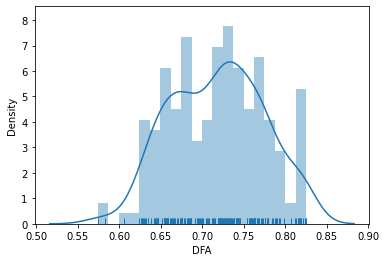

In [ ]:
sns.distplot(data['DFA'],rug=True,kde=True,bins=20);

#### It is a slightly Left-Skewed Distribution with most of the values lying in range 0.6 to 0.8 

### 19) spread1

In [ ]:
data['spread1'].value_counts(bins=5)

(-6.859, -5.753]    65
(-5.753, -4.646]    65
(-7.972, -6.859]    30
(-4.646, -3.54]     27
(-3.54, -2.434]      8
Name: spread1, dtype: int64

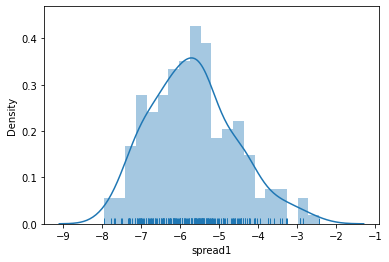

In [ ]:
sns.distplot(data['spread1'],rug=True,kde=True,bins=20);

#### spread1 has negative values and is a near Normal Distribution. The values lie betwwen -8 to -2

### 20) spread2

In [ ]:
data['spread2'].value_counts(bins=5)

(0.184, 0.273]       84
(0.0951, 0.184]      48
(0.273, 0.362]       39
(0.00483, 0.0951]    12
(0.362, 0.45]        12
Name: spread2, dtype: int64

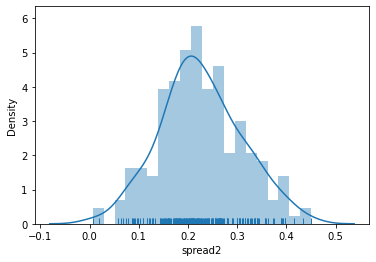

In [ ]:
sns.distplot(data['spread2'],rug=True,kde=True,bins=20);

#### spread2, which is a nonlinear measures of fundamental frequency variation is following a normal distribution with mean and median at 0.22

### 21) D2

In [ ]:
data['D2'].value_counts(bins=5)

(2.322, 2.772]                 77
(1.873, 2.322]                 73
(2.772, 3.222]                 26
(1.4200000000000002, 1.873]    15
(3.222, 3.671]                  4
Name: D2, dtype: int64

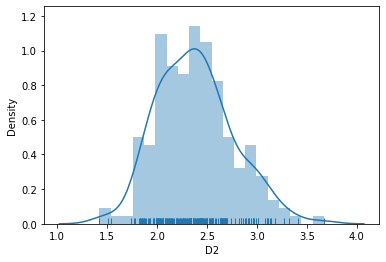

In [ ]:
sns.distplot(data['D2'],rug=True,kde=True,bins=20);

#### D2 is following a normal distribution with maximum value lying at 3.7

### 22) PPE

In [ ]:
data['PPE'].value_counts(bins=5)

(0.141, 0.238]     84
(0.0431, 0.141]    51
(0.238, 0.334]     40
(0.334, 0.431]     16
(0.431, 0.527]      4
Name: PPE, dtype: int64

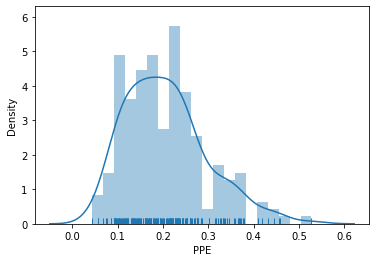

In [ ]:
sns.distplot(data['PPE'],rug=True,kde=True,bins=20);

#### It is a near normal distribution with a slight right skewness and with the maximum value lying at 0.5

# Pairplot for Bivariate Analysis

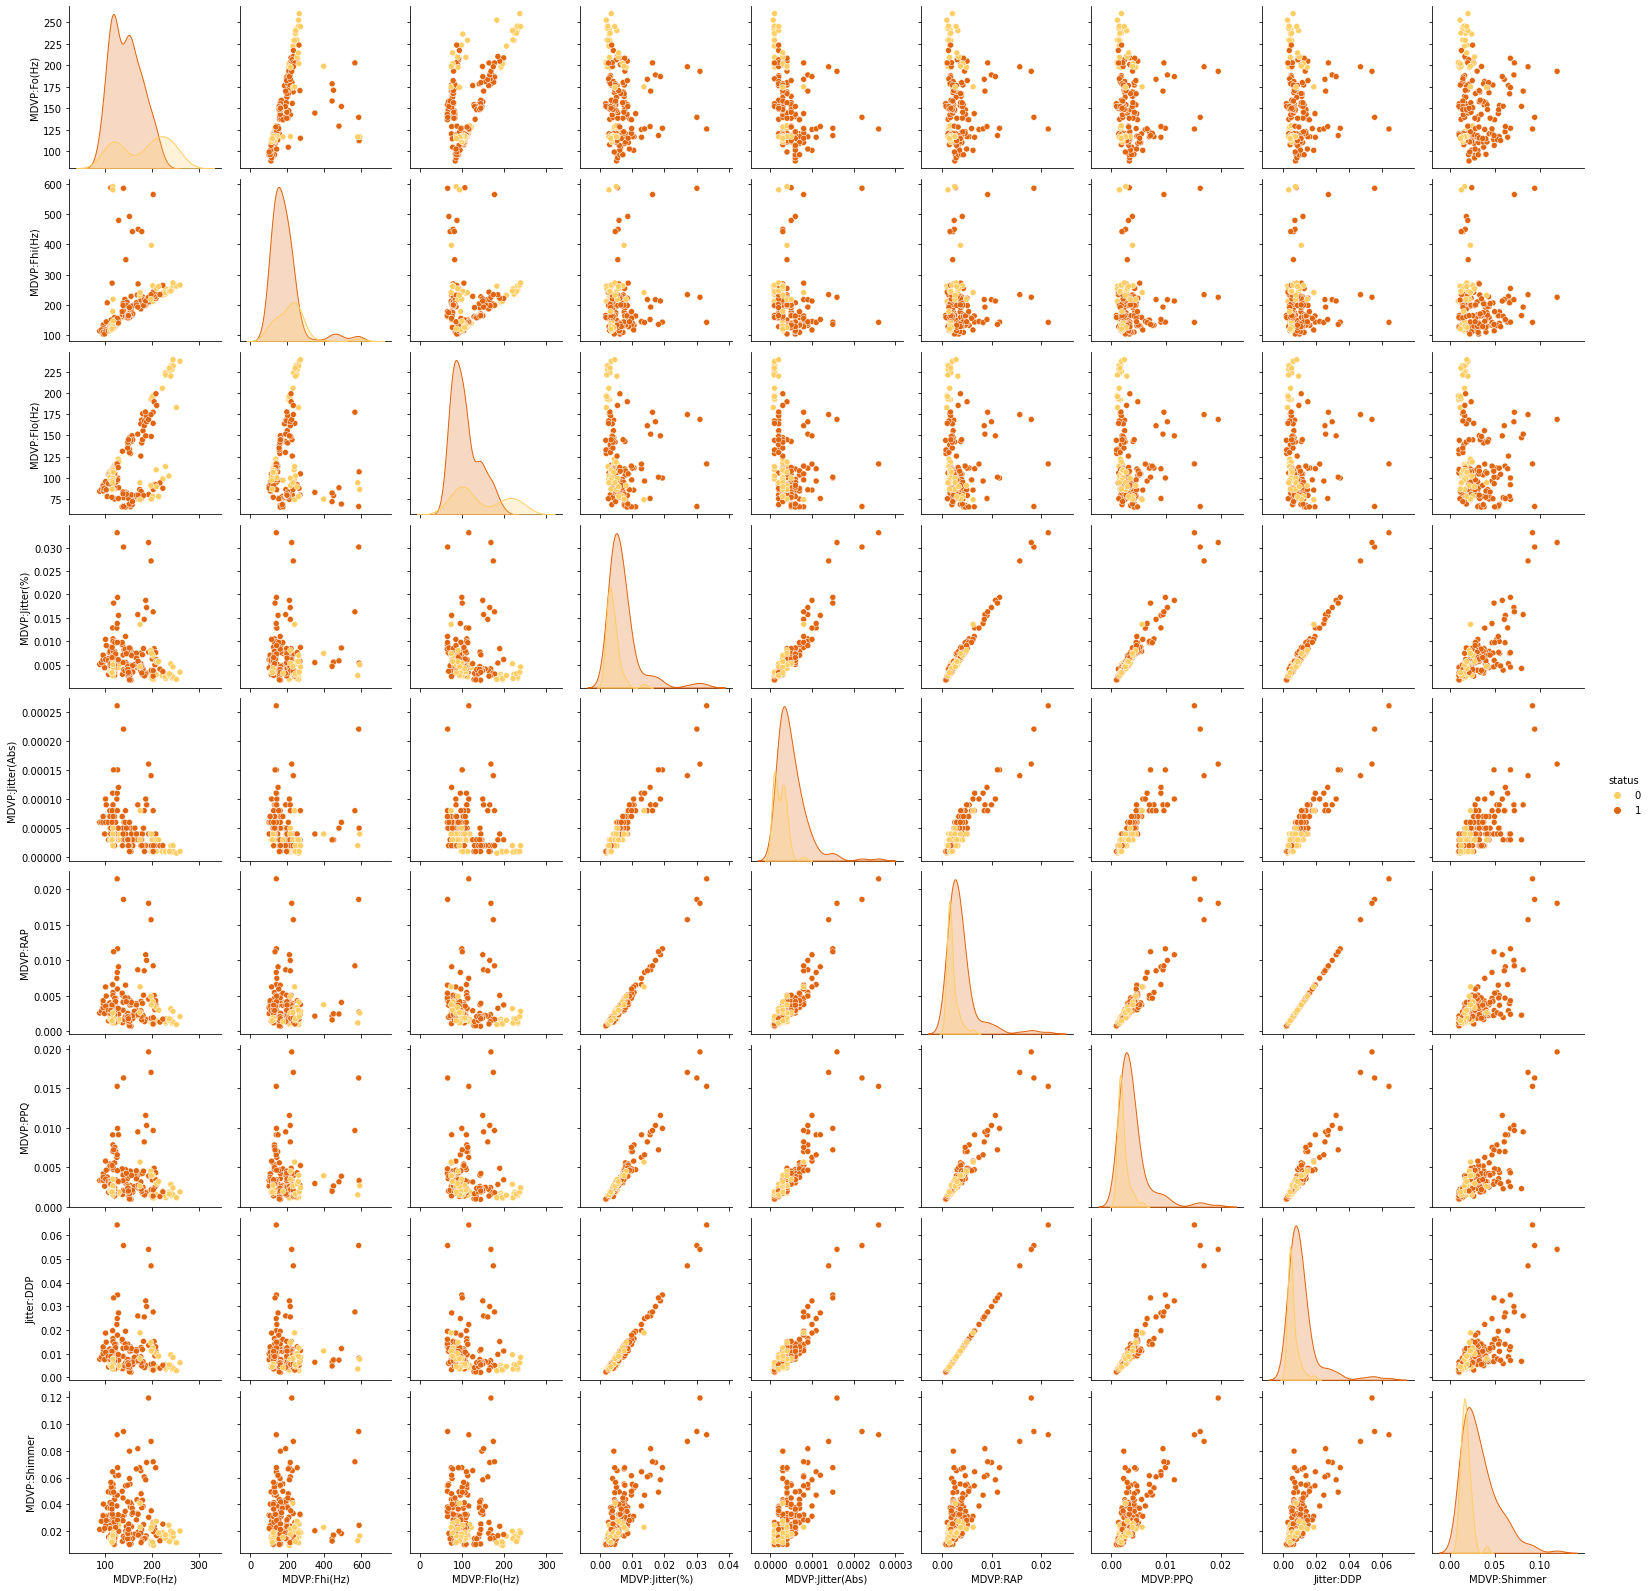

In [ ]:
sns.pairplot(data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer','status']],hue='status',palette='YlOrBr')

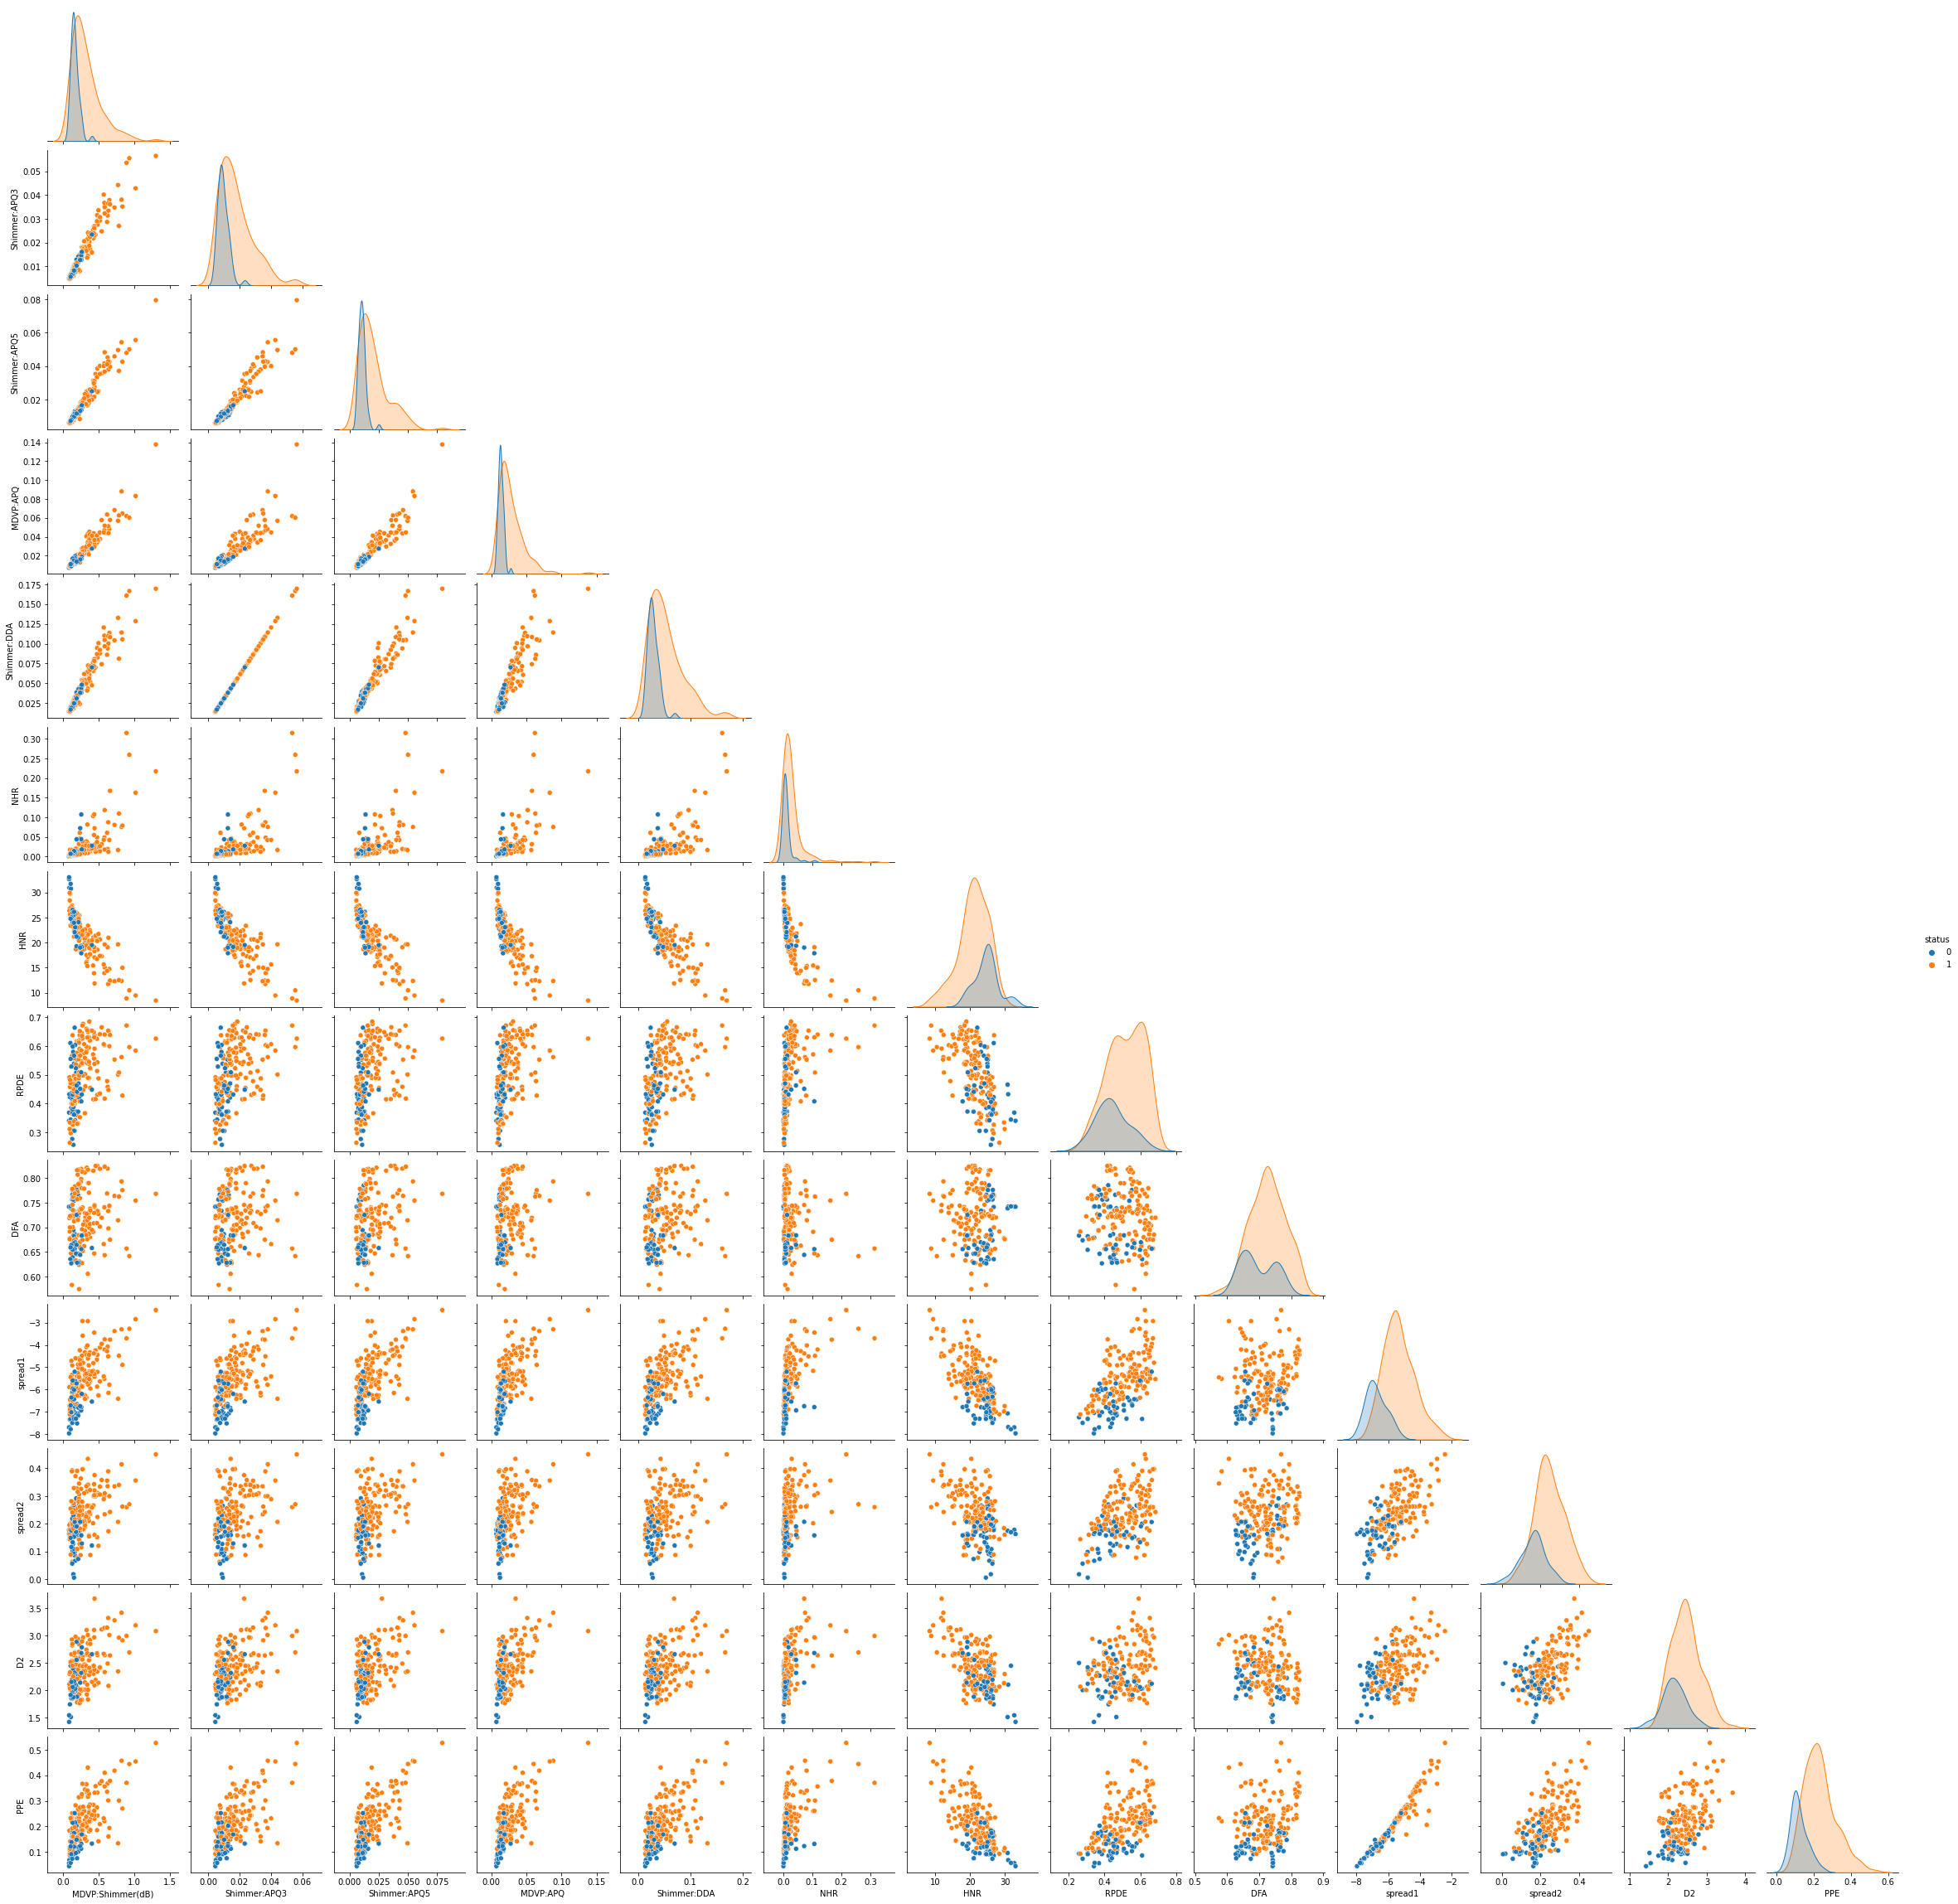

In [ ]:
sns.pairplot(data[['MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']],hue='status',corner=True)

* High correleation between MDVP: Jitter(%) , MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, HNR. These are several measures of variation in fundamental frequency and measures of variation in amplitude.

* Hence we can say that there is high correleation between measures of variation in fundamental frequency and measures of variation in amplitude

* HNR,which is a measure of ratio of noise to tonal components in the voice, has high negative Correleation with MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA and NHR

* HNR has less negative correlation with other variables like RPDE,spread1,spread2,D2,PPE

* spread1,D2,PPE,which are - Three nonlinear measures of fundamental frequency variation are moderately correlated with MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, RPDE

* Some correleation also between MDVP: Fo,Flo,Fhi.It is quite logical since they are Average,Minimum and Maximum vocal fundamental frequency.

* status,which is the target feature has some positive correlation with PPE,spread1,spread2 and a lesser positive correlation with RPDE,Jitter(Abs),PPQ,Shimmer,Shimmer(dB),APQ3,APQ5,APQ, and DDA

* status has some negative correleation with MDVP:Fo,MDVP:Flo and HNR

# Correleation between all features

In [ ]:
corr=data.corr()
corr

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000,0.401,0.597,-0.118,-0.382,-0.076,-0.112,-0.076,-0.098,-0.074,...,-0.095,-0.022,0.059,-0.384,-0.384,-0.446,-0.414,-0.249,0.178,-0.372
MDVP:Fhi(Hz),0.401,1.000,0.085,0.102,-0.029,0.097,0.091,0.097,0.002,0.043,...,-0.004,0.164,-0.025,-0.166,-0.112,-0.343,-0.077,-0.003,0.176,-0.070
MDVP:Flo(Hz),0.597,0.085,1.000,-0.140,-0.278,-0.101,-0.096,-0.100,-0.145,-0.119,...,-0.151,-0.109,0.211,-0.380,-0.400,-0.050,-0.395,-0.244,-0.101,-0.340
MDVP:Jitter(%),-0.118,0.102,-0.140,1.000,0.936,0.990,0.974,0.990,0.769,0.804,...,0.747,0.907,-0.728,0.278,0.361,0.099,0.694,0.385,0.433,0.722
MDVP:Jitter(Abs),-0.382,-0.029,-0.278,0.936,1.000,0.923,0.898,0.923,0.703,0.717,...,0.697,0.835,-0.657,0.339,0.442,0.175,0.736,0.389,0.311,0.748
MDVP:RAP,-0.076,0.097,-0.101,0.990,0.923,1.000,0.957,1.000,0.760,0.791,...,0.745,0.920,-0.722,0.267,0.342,0.064,0.648,0.324,0.427,0.671
MDVP:PPQ,-0.112,0.091,-0.096,0.974,0.898,0.957,1.000,0.957,0.798,0.839,...,0.764,0.845,-0.732,0.289,0.333,0.196,0.716,0.408,0.413,0.770
Jitter:DDP,-0.076,0.097,-0.100,0.990,0.923,1.000,0.957,1.000,0.760,0.791,...,0.745,0.920,-0.721,0.267,0.342,0.064,0.648,0.324,0.427,0.671
MDVP:Shimmer,-0.098,0.002,-0.145,0.769,0.703,0.760,0.798,0.760,1.000,0.987,...,0.988,0.722,-0.835,0.367,0.447,0.160,0.655,0.452,0.507,0.694
MDVP:Shimmer(dB),-0.074,0.043,-0.119,0.804,0.717,0.791,0.839,0.791,0.987,1.000,...,0.963,0.744,-0.828,0.351,0.411,0.165,0.653,0.454,0.512,0.695


<Figure size 2520x2520 with 0 Axes>

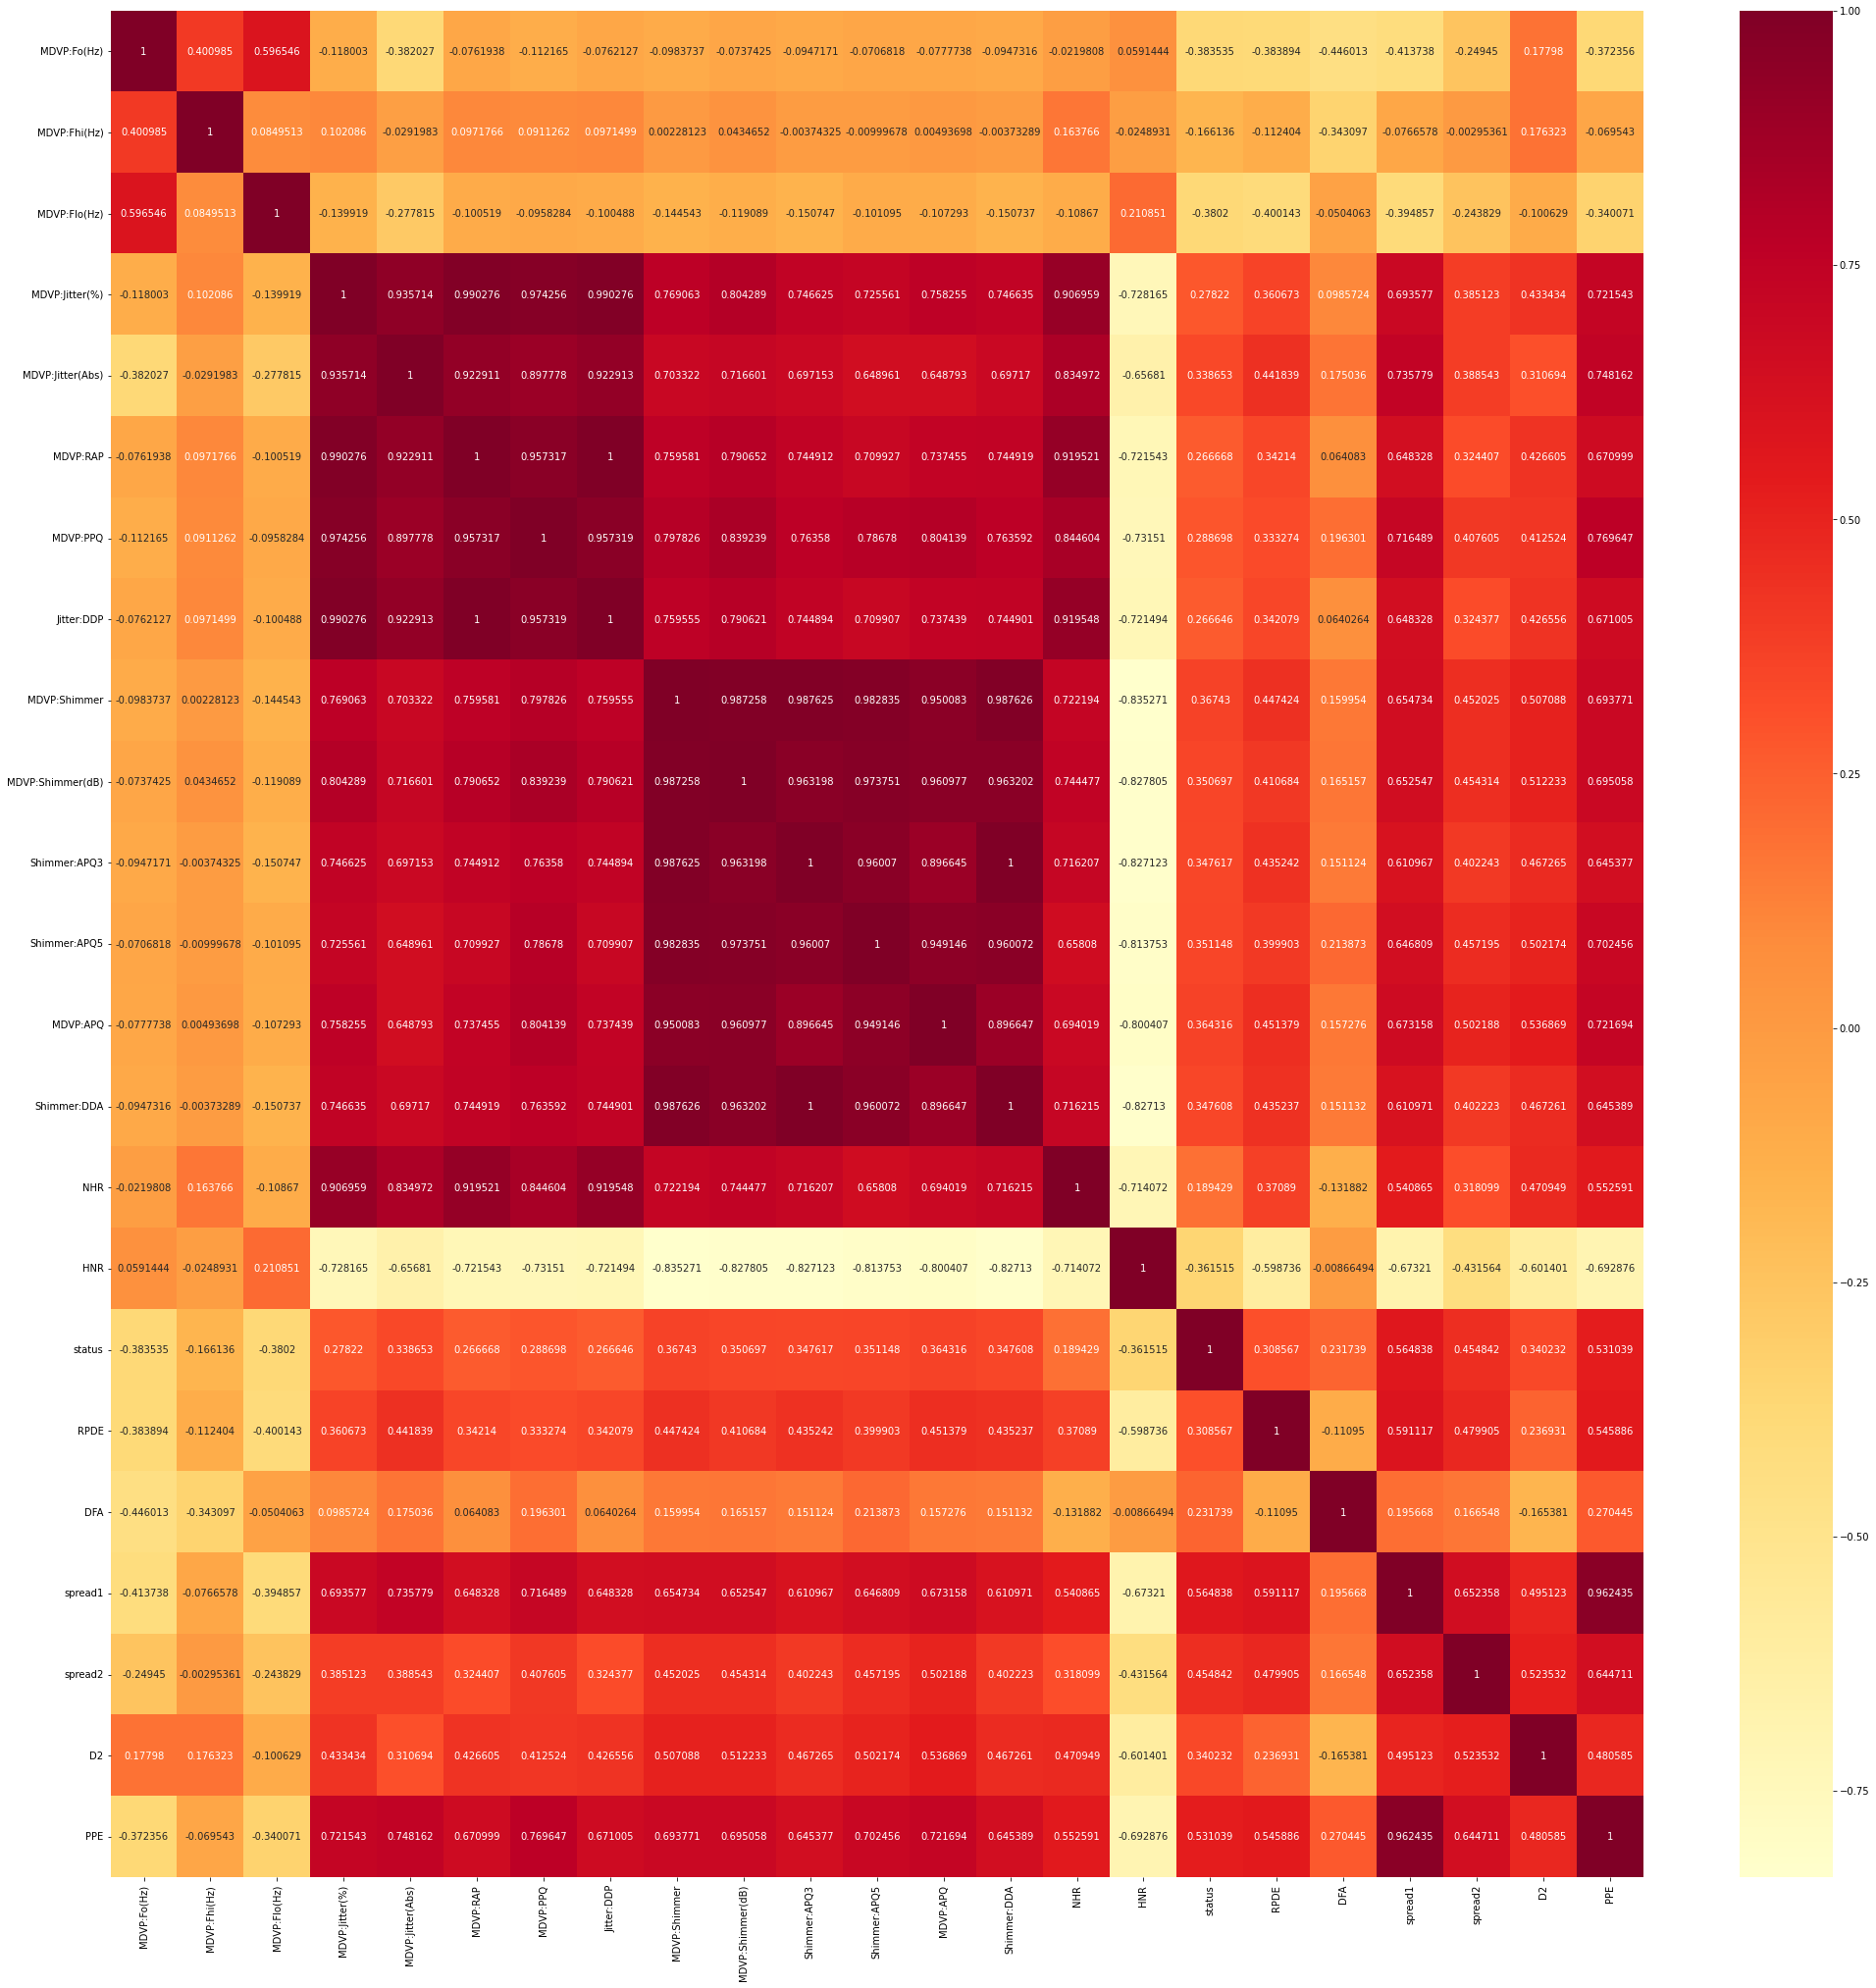

In [ ]:
plt.figure(figsize=(35,35))
sns.heatmap(corr,annot=True,fmt='g',cmap='YlOrRd')

* High correleation between MDVP: Jitter(%) , MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, HNR. These are several measures of variation in fundamental frequency and measures of variation in amplitude.

* Hence we can say that there is high correleation between measures of variation in fundamental frequency and measures of variation in amplitude

* HNR,which is a measure of ratio of noise to tonal components in the voice, has high negative Correleation with MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA and NHR

* HNR has less negative correlation with other variables like RPDE,spread1,spread2,D2,PPE

* spread1,D2,PPE,which are - Three nonlinear measures of fundamental frequency variation are moderately correlated with MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, RPDE

* Some correleation also between MDVP: Fo,Flo,Fhi.It is quite logical since they are Average,Minimum and Maximum vocal fundamental frequency.

* status,which is the target feature has some positive correlation with PPE,spread1,spread2 and a lesser positive correlation with RPDE,Jitter(Abs),PPQ,Shimmer,Shimmer(dB),APQ3,APQ5,APQ, and DDA

* status has some negative correleation with MDVP:Fo,MDVP:Flo and HNR


### Target Column Distribution

In [ ]:
data['status'].value_counts(normalize=True)*100

1   75.385
0   24.615
Name: status, dtype: float64

### We see that the class distribution is 75%-25%. Hence the classes are balanced.

# Step 5 : Prepare the data for training - Scale the data if necessary, get rid of missing values 

In [ ]:
data.isnull().sum().sum()

0

We find that there is no null value in our dataset

In [ ]:
# dropping name column
data.drop(['name'],axis=1,inplace=True)

We drop the name column because it is completely unique and has no predictive power.

## Scaling data

In [ ]:
data_scaled=data.copy(deep=True)

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
mm_scale=MinMaxScaler()
data_scaled['MDVP:Fo(Hz)']=mm_scale.fit_transform(data_scaled[['MDVP:Fo(Hz)']])
data_scaled['MDVP:Fhi(Hz)']=mm_scale.fit_transform(data_scaled[['MDVP:Fhi(Hz)']])
data_scaled['MDVP:Flo(Hz)']=mm_scale.fit_transform(data_scaled[['MDVP:Flo(Hz)']])
data_scaled['MDVP:Shimmer(dB)']=mm_scale.fit_transform(data_scaled[['MDVP:Shimmer(dB)']])
data_scaled['HNR']=mm_scale.fit_transform(data_scaled[['HNR']])
data_scaled['spread1']=mm_scale.fit_transform(data_scaled[['spread1']])
data_scaled['D2']=mm_scale.fit_transform(data_scaled[['D2']])

In [ ]:
data_scaled.sample(5)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
116,0.407,0.695,0.037,0.005,0.000,0.002,0.002,0.006,0.015,0.052,...,0.018,0.016,0.728,1,0.451,0.654,0.346,0.273,0.542,0.170
26,0.481,0.217,0.058,0.005,0.000,0.003,0.002,0.007,0.020,0.083,...,0.027,0.011,0.710,1,0.419,0.721,0.322,0.226,0.519,0.147
15,0.313,0.235,0.102,0.004,0.000,0.002,0.002,0.005,0.015,0.034,...,0.023,0.008,0.680,1,0.566,0.658,0.475,0.210,0.348,0.235
77,0.129,0.047,0.238,0.005,0.000,0.002,0.003,0.007,0.022,0.092,...,0.039,0.004,0.706,1,0.429,0.816,0.465,0.251,0.158,0.233
7,0.111,0.024,0.224,0.003,0.000,0.001,0.002,0.004,0.016,0.040,...,0.025,0.003,0.750,1,0.637,0.763,0.325,0.184,0.285,0.164


# Step 4 :Split the dataset into training and test set in the ratio of 70:30

In [ ]:
x=data_scaled.drop(['status'],axis=1)
y=data_scaled['status']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=11,stratify=y)

In [ ]:
y.value_counts(normalize=True)*100
y_train.value_counts(normalize=True)*100
y_test.value_counts(normalize=True)*100

1   75.385
0   24.615
Name: status, dtype: float64

1   75.735
0   24.265
Name: status, dtype: float64

1   74.576
0   25.424
Name: status, dtype: float64

# Step 6 : Train at least 3 standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, KNN etc, and note down their accuracies on the test data 

# 1) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,precision_score,f1_score

In [ ]:
LRmod = LogisticRegression() 
LRmod.fit(x_train, y_train)
y_predict = LRmod.predict(x_test)

LogisticRegression()

In [ ]:
LRmod.classes_
LRmod.intercept_
LRmod.coef_

array([0, 1])

array([0.47])

array([[-1.16e+00, -9.33e-01, -1.03e+00,  1.79e-02,  1.38e-04,  1.26e-02,
         1.09e-02,  3.77e-02,  1.24e-01,  9.71e-01,  6.51e-02,  7.24e-02,
         1.07e-01,  1.95e-01,  1.09e-02, -8.87e-01,  9.09e-02,  5.27e-01,
         2.13e+00,  1.00e+00,  1.14e+00,  9.28e-01]])

In [ ]:
# Presenting Coeffcients and Intercept values in a Dataframe
coef_df = pd.DataFrame(LRmod.coef_)
coef_df['intercept'] = LRmod.intercept_

cols=[]
for i in np.arange(22):
    temp='coef_'+str(i)
    cols.append(temp)

coef_df = pd.DataFrame(LRmod.coef_,columns=[cols],index=['Values'])
coef_df['intercept'] = LRmod.intercept_
coef_df

,coef_0,coef_1,coef_2,coef_3,coef_4,coef_5,coef_6,coef_7,coef_8,coef_9,...,coef_13,coef_14,coef_15,coef_16,coef_17,coef_18,coef_19,coef_20,coef_21,intercept
Values,-1.162,-0.933,-1.027,0.018,0.000,0.013,0.011,0.038,0.124,0.971,...,0.195,0.011,-0.887,0.091,0.527,2.134,1.002,1.144,0.928,0.473


## Metrics for Logistic Regression

In [ ]:
LRmod.score(x_train, y_train)
LRmod.score(x_test, y_test)

0.875

0.8135593220338984

In [ ]:
Accu_score=accuracy_score(y_test,y_predict)*100
recall=(recall_score(y_test,y_predict)*100)
precision=(precision_score(y_test,y_predict)*100)
f1score=(f1_score(y_test,y_predict)*100)

In [ ]:
print("Accuracy of Logistic Regression Model is %0.3f"%Accu_score)
print("Misclassification Rate of Logistic Regression Model is %0.3f"%(100- Accu_score))
print("F!-score of Logistic Regression Model is %0.3f"%f1score)
print("Recall( =TP/(TP+FN)) is %0.3f "% recall)
print("Precision( =TP/(TP+FP)) is %0.3f" %precision)

Accuracy of Logistic Regression Model is 81.356
Misclassification Rate of Logistic Regression Model is 18.644
F!-score of Logistic Regression Model is 88.889
Recall( =TP/(TP+FN)) is 100.000 
Precision( =TP/(TP+FP)) is 80.000


In [ ]:
print('CLASSIFICATION REPORT FOR LOGISTIC REGRESSION')
print(classification_report(y_test, y_predict, digits=2))

CLASSIFICATION REPORT FOR LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       1.00      0.27      0.42        15
           1       0.80      1.00      0.89        44

    accuracy                           0.81        59
   macro avg       0.90      0.63      0.65        59
weighted avg       0.85      0.81      0.77        59



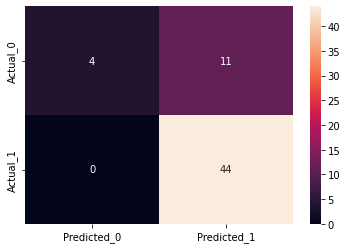

In [ ]:
cm=confusion_matrix(y_test, y_predict)

dcm=pd.DataFrame(cm,index=['Actual_0', 'Actual_1'],columns=['Predicted_0', 'Predicted_1',])
sns.heatmap(dcm,annot=True,fmt='.9g');

## Classifiers Summary

In [ ]:
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'Accuracy': Accu_score,'Recall':recall,'Precision':precision,'F1-Score':f1score})
resultsDf = resultsDf[['Method', 'Accuracy','Recall','Precision','F1-Score']]
resultsDf

,Method,Accuracy,Recall,Precision,F1-Score
0,Logistic Regression,81.356,100.000,80.000,88.889


# 2) KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score


In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_predict=knn.predict(x_test)
accuracy_score(y_test, y_predict)

KNeighborsClassifier(n_neighbors=3)

0.9152542372881356

## For KNN, using Grid Search for finding best hyperparameter values. 

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3,5,7,9,11,13,19,21,23,25,27,29],
             'metric':['euclidean','manhattan'],}
grid = GridSearchCV(knn, param_grid)
%time grid.fit(x_train, y_train)
print(grid.best_params_)
Kbest = grid.best_estimator_
y_predict_Grid = Kbest.predict(x_test)

CPU times: user 557 ms, sys: 1.83 ms, total: 559 ms
Wall time: 559 ms


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 19, 21, 23, 25, 27,
                                         29]})

{'metric': 'euclidean', 'n_neighbors': 3}


In [ ]:
Accu_score2=accuracy_score(y_test,y_predict_Grid)*100
recall2=(recall_score(y_test,y_predict_Grid)*100)
precision2=(precision_score(y_test,y_predict_Grid)*100)
f1score2=f1_score(y_test,y_predict_Grid)*100

In [ ]:
print("Accuracy of KNN is %0.3f"%Accu_score2)
print("Misclassification Rate of KNN Model is %0.3f"%(100- Accu_score2))
print("F1-Score of KNN is %0.3f"%f1score2)
print("Recall( =TP/(TP+FN)) is %0.3f "% recall2)
print("Precision( =TP/(TP+FP)) is %0.3f" %precision2)

Accuracy of KNN is 91.525
Misclassification Rate of KNN Model is 8.475
F1-Score of KNN is 94.118
Recall( =TP/(TP+FN)) is 90.909 
Precision( =TP/(TP+FP)) is 97.561


In [ ]:
print('CLASSIFICATION REPORT FOR KNN')
print(classification_report(y_test, y_predict_Grid, digits=2))

CLASSIFICATION REPORT FOR KNN
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       0.98      0.91      0.94        44

    accuracy                           0.92        59
   macro avg       0.88      0.92      0.89        59
weighted avg       0.93      0.92      0.92        59



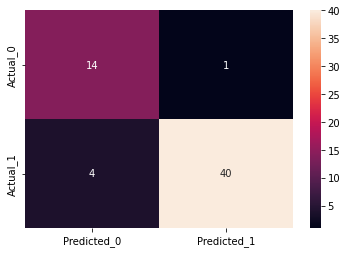

In [ ]:
cm=confusion_matrix(y_test, y_predict_Grid)
dcm=pd.DataFrame(cm,index=['Actual_0', 'Actual_1'],columns=['Predicted_0', 'Predicted_1',])
sns.heatmap(dcm,annot=True,fmt='.9g');

## Best Value of k can also be find with below codes:

In [ ]:
klist=np.arange(3,30,2)
MSE=[]
for i in klist:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    MSE.append(1-accuracy_score(y_test, y_pred))
    
    
    

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=19)

KNeighborsClassifier(n_neighbors=21)

KNeighborsClassifier(n_neighbors=23)

KNeighborsClassifier(n_neighbors=25)

KNeighborsClassifier(n_neighbors=27)

KNeighborsClassifier(n_neighbors=29)

In [ ]:
print('Best value of k for given KNN is-',klist[MSE.index(min(MSE))]) 

Best value of k for given KNN is- 3


Text(0.5, 0, 'Number of Neighbors K')

Text(0, 0.5, 'Misclassification Error')

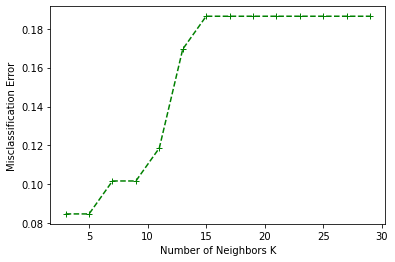

In [ ]:
plt.plot(klist,MSE,'g+--')   # plot misclassification error vs k
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

## Classifiers Summary

In [ ]:
tempResultsDf = pd.DataFrame({'Method':['KNN'], 'Accuracy': Accu_score2,'Recall':recall2,'Precision':precision2,'F1-Score':f1score2})
resultsDf = pd.concat([resultsDf, tempResultsDf],  ignore_index = True)
resultsDf = resultsDf[['Method', 'Accuracy','Recall','Precision','F1-Score']]
resultsDf

,Method,Accuracy,Recall,Precision,F1-Score
0,Logistic Regression,81.356,100.000,80.000,88.889
1,KNN,91.525,90.909,97.561,94.118


# 3) SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC()

## Tuning SVM Hyper-parameters using GridSearch

In [ ]:
param_grid2 = {'C': [0.1, 1, 10, 100],
             'kernel':['linear','rbf','poly','sigmoid'],
             'gamma':[10,1, 0.1, 0.01, 0.001]}
grid2 = GridSearchCV(svm, param_grid2)
%time grid2.fit(x_train, y_train)
print(grid2.best_params_)
SVMbest = grid2.best_estimator_
y_predict_Grid2 = SVMbest.predict(x_test)

CPU times: user 1.83 s, sys: 17.7 ms, total: 1.85 s
Wall time: 1.84 s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [10, 1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

{'C': 10, 'gamma': 10, 'kernel': 'rbf'}


In [ ]:
print(SVMbest.score(x_train, y_train))
print(SVMbest.score(x_test, y_test))

1.0
0.9152542372881356


In [ ]:
print(classification_report(y_test, y_predict_Grid2, digits=2))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        15
           1       1.00      0.89      0.94        44

    accuracy                           0.92        59
   macro avg       0.88      0.94      0.90        59
weighted avg       0.94      0.92      0.92        59



In [ ]:
Accu_score3=accuracy_score(y_test,y_predict_Grid2)*100
recall3=(recall_score(y_test,y_predict_Grid2)*100)
precision3=(precision_score(y_test,y_predict_Grid2)*100)
f1score3=f1_score(y_test,y_predict_Grid2)*100

In [ ]:
print("Accuracy of SVM is %0.3f"%Accu_score3)
print("Misclassification Rate of SVM Model is %0.3f"%(100- Accu_score3))
print("F1-Score of SVM is %0.3f"%f1score3)
print("Recall( =TP/(TP+FN)) is %0.3f "% recall3)
print("Precision( =TP/(TP+FP)) is %0.3f" %precision3)

Accuracy of SVM is 91.525
Misclassification Rate of SVM Model is 8.475
F1-Score of SVM is 93.976
Recall( =TP/(TP+FN)) is 88.636 
Precision( =TP/(TP+FP)) is 100.000


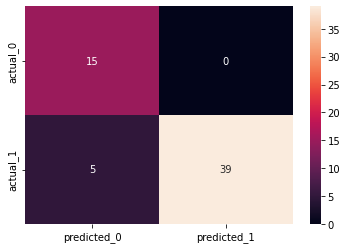

In [ ]:
conf_mat = confusion_matrix(y_test, y_predict_Grid2)
df_conf_mat = pd.DataFrame(conf_mat,
                           index=['actual_0', 'actual_1'],
                           columns=['predicted_0', 'predicted_1',])
sns.heatmap(df_conf_mat,annot=True,fmt='.9g');

In [ ]:
tempResultsDf = pd.DataFrame({'Method':['SVM'], 'Accuracy': Accu_score3,'Recall':recall3,'Precision':precision3,'F1-Score':f1score3})
resultsDf = pd.concat([resultsDf, tempResultsDf],  ignore_index = True)
resultsDf = resultsDf[['Method', 'Accuracy','Recall','Precision','F1-Score']]
resultsDf

,Method,Accuracy,Recall,Precision,F1-Score
0,Logistic Regression,81.356,100.000,80.000,88.889
1,KNN,91.525,90.909,97.561,94.118
2,SVM,91.525,88.636,100.000,93.976


# 4) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1) #can use criterion = 'entropy' also.

In [ ]:
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

1.0
0.864406779661017


# Regualrizing /Pre-Pruning Tree

In [ ]:
param_grid3 = {'max_depth':[1,2,3,4,5],
              'min_samples_leaf':[1,2,3,4,5],
              'min_samples_split':[1,2,3,4,5,6]}
grid3 = GridSearchCV(dTree, param_grid3)
%time grid3.fit(x_train, y_train)
print(grid3.best_params_)
dTreebest = grid3.best_estimator_
y_predict_Grid3 = dTreebest.predict(x_test)

CPU times: user 3.12 s, sys: 30.7 ms, total: 3.15 s
Wall time: 3.15 s


GridSearchCV(estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5, 6]})

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
print(dTreebest.score(x_train, y_train))
print(dTreebest.score(x_test, y_test))

0.9705882352941176
0.8813559322033898


In [ ]:
print(classification_report(y_test, y_predict_Grid3, digits=2))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.93      0.91      0.92        44

    accuracy                           0.88        59
   macro avg       0.84      0.85      0.85        59
weighted avg       0.88      0.88      0.88        59



In [ ]:
Accu_score4=accuracy_score(y_test,y_predict_Grid3)*100
recall4=(recall_score(y_test,y_predict_Grid3)*100)
precision4=(precision_score(y_test,y_predict_Grid3)*100)
f1score4=f1_score(y_test,y_predict_Grid3)*100

In [ ]:
print("Accuracy of Decision Tree is %0.3f"%Accu_score4)
print("Misclassification Rate of Decision Tree Model is %0.3f"%(100- Accu_score4))
print("F1-Score of SVM is %0.3f"%f1score4)
print("Recall( =TP/(TP+FN)) is %0.3f "% recall4)
print("Precision( =TP/(TP+FP)) is %0.3f" %precision4)

Accuracy of Decision Tree is 88.136
Misclassification Rate of Decision Tree Model is 11.864
F1-Score of SVM is 91.954
Recall( =TP/(TP+FN)) is 90.909 
Precision( =TP/(TP+FP)) is 93.023


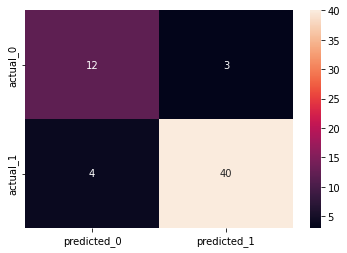

In [ ]:
conf_mat = confusion_matrix(y_test, y_predict_Grid3)
df_conf_mat = pd.DataFrame(conf_mat,
                           index=['actual_0', 'actual_1'],
                           columns=['predicted_0', 'predicted_1',])
sns.heatmap(df_conf_mat,annot=True,fmt='.9g');

In [ ]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'Accuracy': Accu_score4,'Recall':recall4,'Precision':precision4,'F1-Score':f1score4})
resultsDf = pd.concat([resultsDf, tempResultsDf],  ignore_index = True)
resultsDf = resultsDf[['Method', 'Accuracy','Recall','Precision','F1-Score']]
resultsDf

,Method,Accuracy,Recall,Precision,F1-Score
0,Logistic Regression,81.356,100.000,80.000,88.889
1,KNN,91.525,90.909,97.561,94.118
2,SVM,91.525,88.636,100.000,93.976
3,Decision Tree,88.136,90.909,93.023,91.954


# Step 7 : Train a meta-classifier and note the accuracy on test data 

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
# Step 1 - Define base learners

estimators = [
    ('dTreebest', DecisionTreeClassifier(criterion = "gini", random_state = 0, max_depth=3, min_samples_leaf=1,min_samples_split=2)),
    ('LRmod', LogisticRegression(solver='liblinear')),
    ('knn', KNeighborsClassifier(metric='euclidean',n_neighbors=3)),
    ('svm', SVC(C=10,gamma=10,kernel= 'rbf'))]

In [ ]:
# step 2 - Defining meta model & stacking
stack = StackingClassifier(estimators=estimators, 
                           final_estimator=LogisticRegression())
                           #final_estimator=SVC(C=10,gamma=10,kernel= 'rbf'))

In [ ]:
stack.fit(x_train, y_train)

StackingClassifier(estimators=[('dTreebest',
                                DecisionTreeClassifier(max_depth=3,
                                                       random_state=0)),
                               ('LRmod',
                                LogisticRegression(solver='liblinear')),
                               ('knn',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=3)),
                               ('svm', SVC(C=10, gamma=10))],
                   final_estimator=LogisticRegression())

In [ ]:
y_predict2 = stack.predict(x_test)

In [ ]:
stack.score(x_train, y_train)
stack.score(x_test, y_test)

1.0

0.9322033898305084

In [ ]:
print(classification_report(y_test, y_predict2, digits=2))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.98      0.93      0.95        44

    accuracy                           0.93        59
   macro avg       0.90      0.93      0.91        59
weighted avg       0.94      0.93      0.93        59



In [ ]:
Accu_score5=accuracy_score(y_test,y_predict2)*100
recall5=(recall_score(y_test,y_predict2)*100)
precision5=(precision_score(y_test,y_predict2)*100)
f1score5=f1_score(y_test,y_predict2)*100

In [ ]:
print("Accuracy of Stacking Classifier  is %0.3f"%Accu_score5)
print("Misclassification Rate of Stacking Classifier Model is %0.3f"%(100- Accu_score5))
print("F1-Score of SVM is %0.3f"%f1score5)
print("Recall( =TP/(TP+FN)) is %0.3f "% recall5)
print("Precision( =TP/(TP+FP)) is %0.3f" %precision5)

Accuracy of Stacking Classifier  is 93.220
Misclassification Rate of Stacking Classifier Model is 6.780
F1-Score of SVM is 95.349
Recall( =TP/(TP+FN)) is 93.182 
Precision( =TP/(TP+FP)) is 97.619


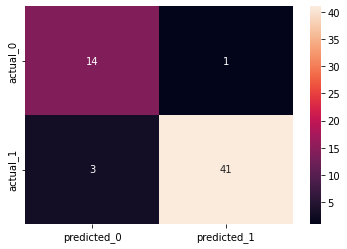

In [ ]:
conf_mat = confusion_matrix(y_test, y_predict2)
df_conf_mat = pd.DataFrame(conf_mat,
                           index=['actual_0', 'actual_1'],
                           columns=['predicted_0', 'predicted_1',])
sns.heatmap(df_conf_mat,annot=True,fmt='.9g');

In [ ]:
tempResultsDf = pd.DataFrame({'Method':['Meta Classifier'], 'Accuracy': Accu_score5,'Recall':recall5,'Precision':precision5,'F1-Score':f1score5})
resultsDf = pd.concat([resultsDf, tempResultsDf],  ignore_index = True)
resultsDf = resultsDf[['Method', 'Accuracy','Recall','Precision','F1-Score']]
resultsDf

,Method,Accuracy,Recall,Precision,F1-Score
0,Logistic Regression,81.356,100.000,80.000,88.889
1,KNN,91.525,90.909,97.561,94.118
2,SVM,91.525,88.636,100.000,93.976
3,Decision Tree,88.136,90.909,93.023,91.954
4,Meta Classifier,93.220,93.182,97.619,95.349


# Step 8 : Train at least one standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy

# 1) Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)

In [ ]:
y_predict_en1 = bgcl.predict(x_test)

In [ ]:
bgcl.score(x_train , y_train)
bgcl.score(x_test , y_test)

0.9926470588235294

0.8983050847457628

In [ ]:
Accu_score6=accuracy_score(y_test,y_predict_en1)*100
recall6=(recall_score(y_test,y_predict_en1)*100)
precision6=(precision_score(y_test,y_predict_en1)*100)
f1score6=f1_score(y_test,y_predict_en1)*100

print("Accuracy of Bagging Classifier  is %0.3f"%Accu_score6)
print("Misclassification Rate of Bagging Classifier Model is %0.3f"%(100- Accu_score6))
print("F1-Score of SVM is %0.3f"%f1score6)
print("Recall( =TP/(TP+FN)) is %0.3f "% recall6)
print("Precision( =TP/(TP+FP)) is %0.3f" %precision6)

Accuracy of Bagging Classifier  is 89.831
Misclassification Rate of Bagging Classifier Model is 10.169
F1-Score of SVM is 93.333
Recall( =TP/(TP+FN)) is 95.455 
Precision( =TP/(TP+FP)) is 91.304


<Figure size 504x360 with 0 Axes>

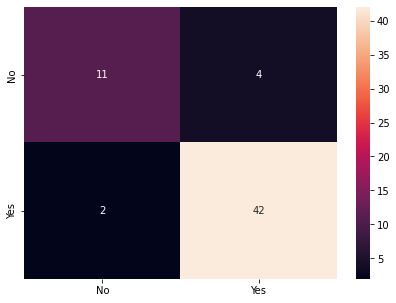

In [ ]:
cm=confusion_matrix(y_test, y_predict_en1,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
tempResultsDf = pd.DataFrame({'Method':['Bagging Classifier'], 'Accuracy': Accu_score6,'Recall':recall6,'Precision':precision6,'F1-Score':f1score6})
resultsDf = pd.concat([resultsDf, tempResultsDf],  ignore_index = True)
resultsDf = resultsDf[['Method', 'Accuracy','Recall','Precision','F1-Score']]
resultsDf

,Method,Accuracy,Recall,Precision,F1-Score
0,Logistic Regression,81.356,100.000,80.000,88.889
1,KNN,91.525,90.909,97.561,94.118
2,SVM,91.525,88.636,100.000,93.976
3,Decision Tree,88.136,90.909,93.023,91.954
4,Meta Classifier,93.220,93.182,97.619,95.349
5,Bagging Classifier,89.831,95.455,91.304,93.333


# 2) Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=30, random_state=1)

abcl = abcl.fit(x_train, y_train)

In [ ]:
y_predict_en2 = abcl.predict(x_test)

In [ ]:
abcl.score(x_train , y_train)
abcl.score(x_test , y_test)

1.0

0.8813559322033898

In [ ]:
Accu_score7=accuracy_score(y_test,y_predict_en2)*100
recall7=(recall_score(y_test,y_predict_en2)*100)
precision7=(precision_score(y_test,y_predict_en2)*100)
f1score7=f1_score(y_test,y_predict_en2)*100

print("Accuracy of Adaboost Classifier  is %0.3f"%Accu_score7)
print("Misclassification Rate of Adaboost Classifier Model is %0.3f"%(100- Accu_score7))
print("F1-Score of SVM is %0.3f"%f1score7)
print("Recall( =TP/(TP+FN)) is %0.3f "% recall7)
print("Precision( =TP/(TP+FP)) is %0.3f" %precision7)

Accuracy of Adaboost Classifier  is 88.136
Misclassification Rate of Adaboost Classifier Model is 11.864
F1-Score of SVM is 92.473
Recall( =TP/(TP+FN)) is 97.727 
Precision( =TP/(TP+FP)) is 87.755


<Figure size 504x360 with 0 Axes>

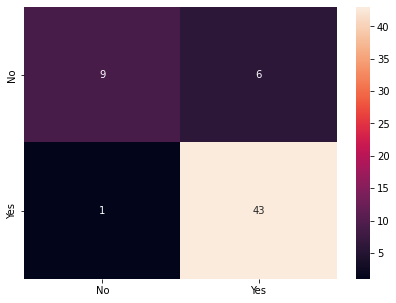

In [ ]:
cm=confusion_matrix(y_test, y_predict_en2,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost Classifier'], 'Accuracy': Accu_score7,'Recall':recall7,'Precision':precision7,'F1-Score':f1score7})
resultsDf = pd.concat([resultsDf, tempResultsDf],  ignore_index = True)
resultsDf = resultsDf[['Method', 'Accuracy','Recall','Precision','F1-Score']]
resultsDf

,Method,Accuracy,Recall,Precision,F1-Score
0,Logistic Regression,81.356,100.000,80.000,88.889
1,KNN,91.525,90.909,97.561,94.118
2,SVM,91.525,88.636,100.000,93.976
3,Decision Tree,88.136,90.909,93.023,91.954
4,Meta Classifier,93.220,93.182,97.619,95.349
5,Bagging Classifier,89.831,95.455,91.304,93.333
6,Adaboost Classifier,88.136,97.727,87.755,92.473


# 3) Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 40, random_state=0)
rfcl = rfcl.fit(x_train, y_train)

In [ ]:
y_predict_en3 = rfcl.predict(x_test)

In [ ]:
rfcl.score(x_train , y_train)
rfcl.score(x_test , y_test)

1.0

0.8813559322033898

In [ ]:
Accu_score8=accuracy_score(y_test,y_predict_en3)*100
recall8=(recall_score(y_test,y_predict_en3)*100)
precision8=(precision_score(y_test,y_predict_en3)*100)
f1score8=f1_score(y_test,y_predict_en3)*100

print("Accuracy of Random Forest Classifier  is %0.3f"%Accu_score8)
print("Misclassification Rate of Random Forest Classifier Model is %0.3f"%(100- Accu_score8))
print("F1-Score of SVM is %0.3f"%f1score8)
print("Recall( =TP/(TP+FN)) is %0.3f "% recall8)
print("Precision( =TP/(TP+FP)) is %0.3f" %precision8)

Accuracy of Random Forest Classifier  is 88.136
Misclassification Rate of Random Forest Classifier Model is 11.864
F1-Score of SVM is 92.308
Recall( =TP/(TP+FN)) is 95.455 
Precision( =TP/(TP+FP)) is 89.362


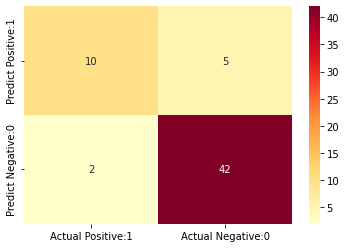

In [ ]:
cm=confusion_matrix(y_test, y_predict_en3,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
#plt.figure(figsize = (7,5))
#sns.heatmap(df_cm, annot=True ,fmt='g')

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlOrRd')

In [ ]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest Classifier'], 'Accuracy': Accu_score8,'Recall':recall8,'Precision':precision8,'F1-Score':f1score8})
resultsDf = pd.concat([resultsDf, tempResultsDf],  ignore_index = True)
resultsDf = resultsDf[['Method', 'Accuracy','Recall','Precision','F1-Score']]
resultsDf

,Method,Accuracy,Recall,Precision,F1-Score
0,Logistic Regression,81.356,100.000,80.000,88.889
1,KNN,91.525,90.909,97.561,94.118
2,SVM,91.525,88.636,100.000,93.976
3,Decision Tree,88.136,90.909,93.023,91.954
4,Meta Classifier,93.220,93.182,97.619,95.349
5,Bagging Classifier,89.831,95.455,91.304,93.333
6,Adaboost Classifier,88.136,97.727,87.755,92.473
7,Random Forest Classifier,88.136,95.455,89.362,92.308


# Step 9: Compare all the models (minimum 5) and pick the best one among them

In [ ]:
resultsDf

,Method,Accuracy,Recall,Precision,F1-Score
0,Logistic Regression,81.356,100.000,80.000,88.889
1,KNN,91.525,90.909,97.561,94.118
2,SVM,91.525,88.636,100.000,93.976
3,Decision Tree,88.136,90.909,93.023,91.954
4,Meta Classifier,93.220,93.182,97.619,95.349
5,Bagging Classifier,89.831,95.455,91.304,93.333
6,Adaboost Classifier,88.136,97.727,87.755,92.473
7,Random Forest Classifier,88.136,95.455,89.362,92.308


####  Apart from Logistic Regression, every other models have comparable accuracy and F1-Score. Among all these models, we see that "Adaboost Classifier" has highest Recall. This suggest that most of the people (97.73%) suffering from Parkinson’s Disease (PD) will be identified correctly.

#### While Logistic regression have the highest Recall of 100% (all the people suffering from PD will be correctly identified), it has a poor Precision compared to Adaboost. This will result in many more people falsly being identified as having PD compared to Adaboost Classifier. Logistic Regression also has significantly lower Accuracy.

### Given the above rationale, "Adaboost Classifier" can be considered as the best Model in this case.